# Q7

+ Build a linear model for the stackloss dataset to predict the value of StackLoss from the other (independent) variables. 
+ Iterate to include appropriate quadratic terms.

In [14]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv("data/stackloss.csv")
# print(type(df))
# df.head()

### Explore the data

**This is a very small dataset. Just 21 instances.**

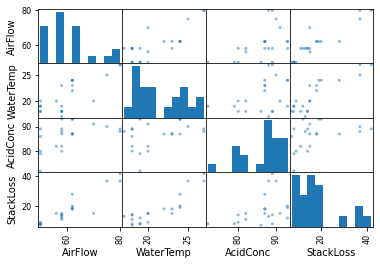

In [7]:
# Draw scatter matrix
# scatter_matrix(df, figsize=(10, 10))
scatter_matrix(df)
plt.show()
# plt.savefig('plots/p3stacklossScatter.png')

**Note: Both Airflow and WaterTemp could have a quadratic dependency**

### Build the model

In [21]:
X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

# print('intercept:', model.intercept_)
# print('slope:', model.coef_)
print('R squared:', model.score(X,y))

yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.9013813070763419
RMSE 3.772926357336115


# Iterate and use quadratic terms

In [22]:
X = df.drop('StackLoss', axis='columns')
y = df.StackLoss

X['AFsquared'] = np.square(X.AirFlow)
X['WTsquared'] = np.square(X.WaterTemp)

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

print('R squared:', model.score(X,y))
yhat = model.predict(X_test)
print('RMSE', mean_squared_error(y_test, yhat, squared=False))

R squared: 0.92995729407283
RMSE 3.03266657162797


**Note**
+ R^2 has gone up. This is good but you need to be careful with this, as in general it can go up when more variables are added.
+ RMSE has gone down. This is the important measure. Tells us the model is better on previously unseen data. 